# End-to-End ML Regression Project
## California Housing Dataset

We will work through an example project end to end,
pretending to be a recently hired data scientist at a real estate company. Here
are the main steps you will go through:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune the  model.
7. Present the solution.
8. Launch, monitor, and maintain your system.

Welcome to the Machine Learning Housing Corporation! Your first task is to
use California census data to build a model of housing prices in the state.

This data includes metrics such as the population, median income, and median
housing price for each block group in California.

First, you need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or
something else?

Let’s see:
- It is clearly a typical supervised
learning task, since you are given labeled training examples (each instance
comes with the expected output, i.e., the district’s **median housing price**).
- It is
also a typical regression task, since you are asked to predict a value - **median_house_value**. More
specifically, this is a **multiple regression problem**, since the system will use
multiple features to make a prediction (it will use the district’s population, the
median income, etc.).

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('https://raw.githubusercontent.com/instituteofai/ML-101/master/Datasets/cal_housing.csv')
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations**

- There are 20,640 instances in the dataset
- the **total_bedrooms** attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.
- All attributes are numerical, except the ocean_proximity field
- Looking at the at the top five rows of the dataset, you probably noticed that the values in the **ocean_proximity column were repetitive**, which means that it is **probably a categorical attribute**. We can find out what categories exist and how many districts belong to each category by using the `value_counts()` method:

In [5]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- The count, mean, min, and max rows are self-explanatory. Note that the null
values are ignored (so, for example, the **count of total_bedrooms is 20,433, not 20,640)**.
- The std row shows the standard deviation, which measures how
dispersed the values are.
- The 25%, 50%, and 75% rows show the
corresponding percentiles: a percentile indicates the value below which a
given percentage of observations in a group of observations fall.  
For example,
**25% of the districts have a housing_median_age lower than 18**, while 50%
are lower than 29 and 75% are lower than 37. These are often called the 25th
percentile (or first quartile), the median, and the 75th percentile (or third
quartile)

Another quick way to get a feel of the type of data you are dealing with is to
**plot a histogram for each numerical attribute**. A histogram shows the number
of instances (on the vertical axis) that have a given value range (on the
horizontal axis). You can either plot this **one attribute at a time, or** you can
**call the `hist()` method on the whole dataset**.

Note: You can call the plots from panda objects itself.

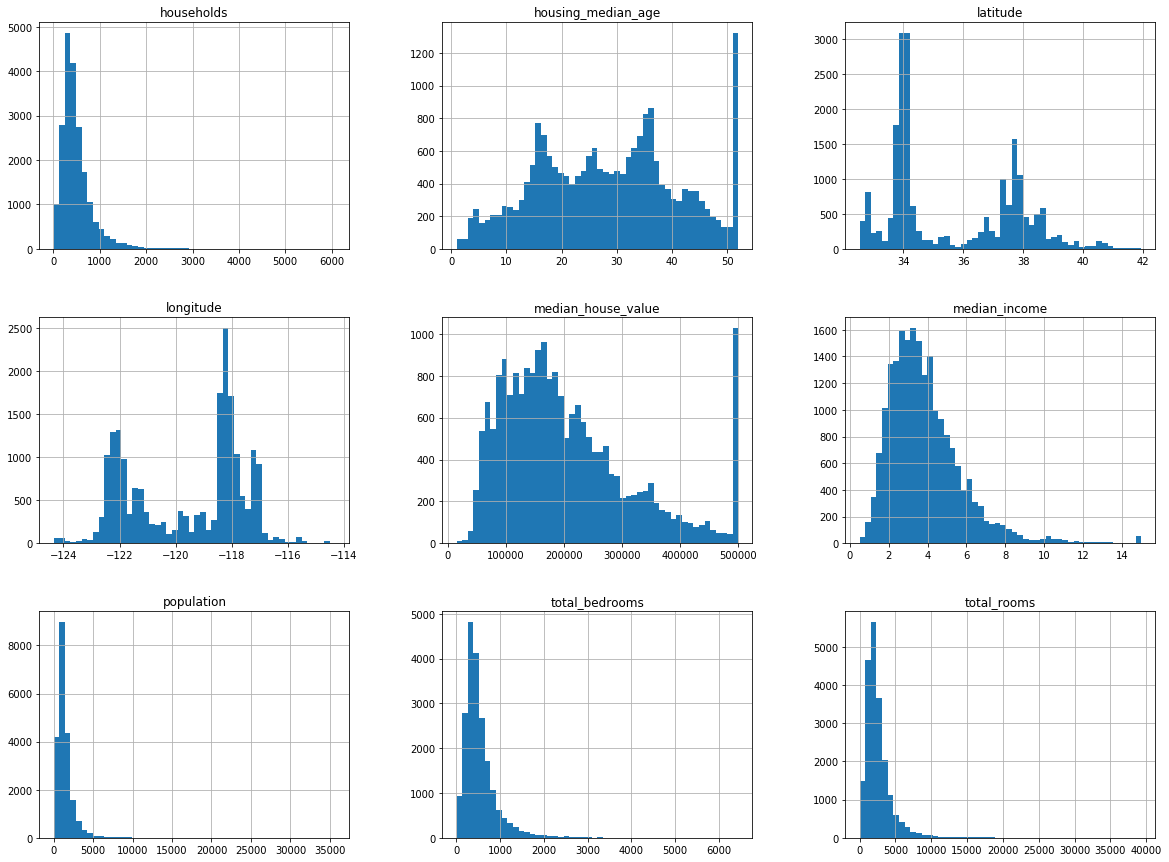

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15),)
plt.show()

In [9]:
# Create a test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=21) # random_state: reproducibility

print(housing.shape)
print(train_set.shape)
print(test_set.shape)

(20640, 10)
(16512, 10)
(4128, 10)


In [10]:
housing = train_set.copy()

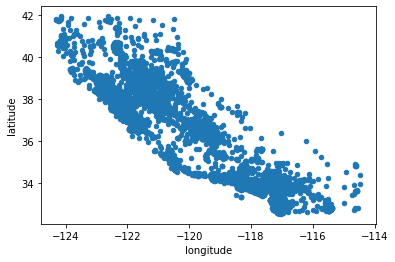

In [11]:
housing.plot(kind='scatter', x='longitude', y='latitude')

In [12]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,110600.0,INLAND


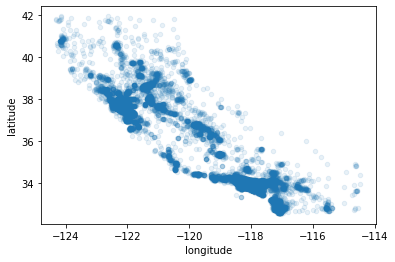

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

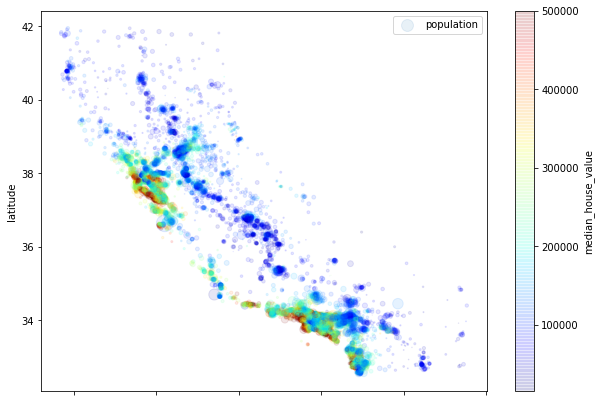

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
            s=housing['population']/100, label='population', figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

California housing prices:
- **red is expensive**
- **blue is cheap**
- **larger circles indicate areas with a larger population**

This image tells you that the **housing prices are very much related to the location (e.g., close to the ocean) and to the population density**, as we
probably knew already.

In [15]:
# correlation

corr_matrix = housing.corr()

In [16]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924500,-0.106847,0.043146,0.068432,0.099111,0.054186,-0.014959,-0.045935
latitude,-0.924500,1.000000,0.010600,-0.035544,-0.066824,-0.109164,-0.070711,-0.079574,-0.144006
housing_median_age,-0.106847,0.010600,1.000000,-0.360773,-0.320957,-0.300691,-0.303639,-0.117081,0.106616
total_rooms,0.043146,-0.035544,-0.360773,1.000000,0.930211,0.862283,0.917762,0.196885,0.136088
total_bedrooms,0.068432,-0.066824,-0.320957,0.930211,1.000000,0.883126,0.979122,-0.009437,0.049483
population,0.099111,-0.109164,-0.300691,0.862283,0.883126,1.000000,0.912751,0.004934,-0.023716
households,0.054186,-0.070711,-0.303639,0.917762,0.979122,0.912751,1.000000,0.011450,0.066740
median_income,-0.014959,-0.079574,-0.117081,0.196885,-0.009437,0.004934,0.011450,1.000000,0.689804
median_house_value,-0.045935,-0.144006,0.106616,0.136088,0.049483,-0.023716,0.066740,0.689804,1.000000


In [17]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689804
total_rooms           0.136088
housing_median_age    0.106616
households            0.066740
total_bedrooms        0.049483
population           -0.023716
longitude            -0.045935
latitude             -0.144006
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1.
- When it is close to 1, it means
that there is a strong positive correlation; for example, the **median house value** tends to go up when the **median income** goes up.
- When the coefficient is
close to –1, it means that there is a strong negative correlation; we can see a
small **negative correlation between the** **latitude** and the **median house value**
(i.e., **prices have a slight tendency to go down when you go north**).
- Finally,
coefficients close to 0 mean that there is no linear correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD1D5D0A08>,
      dtype=object)

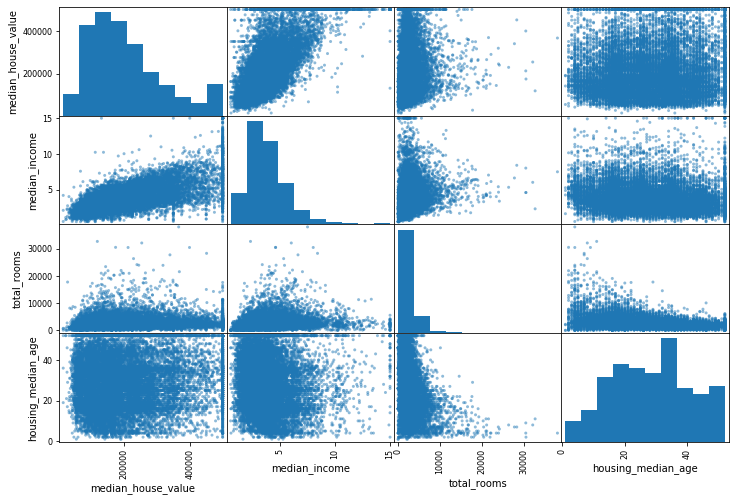

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

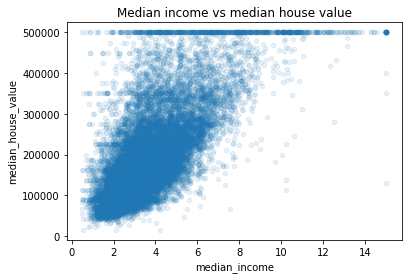

In [19]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, title="Median income vs median house value")

**Attribute Combinations**  

The **total number of rooms in a district is not very useful** if we don’t know how many households there are.

What we really want is the **number of rooms per household**.

Similarly, the **total number of bedrooms by itself is not very useful**: we probably want to compare it to the **number of rooms** and the **population per household also seems like an interesting attribute combination**
to look at. Let’s create these new attributes:

In [20]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

housing['population_per_household'] = housing['population'] / housing['households']

In [21]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689804
rooms_per_household         0.153596
total_rooms                 0.136088
housing_median_age          0.106616
households                  0.066740
total_bedrooms              0.049483
population_per_household   -0.022244
population                 -0.023716
longitude                  -0.045935
latitude                   -0.144006
bedrooms_per_room          -0.261426
Name: median_house_value, dtype: float64

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,110600.0,INLAND,3.793296,0.241532,4.296089
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,213300.0,INLAND,6.703349,0.159529,2.284689
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,282300.0,<1H OCEAN,5.605114,0.193614,2.198864
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,NEAR BAY,4.851351,0.199761,2.023166
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,97400.0,INLAND,4.617530,0.238999,3.374502


## **Prepare the Data for Machine Learning Algorithms**

> **Data Preprocessing**

It’s time to prepare the data for our Machine Learning algorithms. Instead of
doing this manually, **we should write functions** for this purpose, for several
good reasons:
- This will allow you **to reproduce these transformations easily** on any
dataset (e.g., the next time you get a fresh dataset).
- You will **gradually build a library of transformation functions** that
you can reuse in future projects.
- You **can use these functions in your live system to transform the new data** before feeding it to your algorithms.
- This will make it possible for you to easily try various
transformations and see which combination of transformations works
best.

But first let’s revert to a clean training set (by copying `train_set`
once again). Let’s also **separate the predictors and the labels**, since we don’t want to apply the same transformations to the predictors and the
target values (note that `drop()` creates a copy of the data and does not affect
`train_set`):

In [23]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,110600.0,INLAND,3.793296,0.241532,4.296089
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,213300.0,INLAND,6.703349,0.159529,2.284689
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,282300.0,<1H OCEAN,5.605114,0.193614,2.198864
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,NEAR BAY,4.851351,0.199761,2.023166
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,97400.0,INLAND,4.617530,0.238999,3.374502
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,-121.23,38.12,22.0,393.0,58.0,134.0,57.0,3.9500,178100.0,INLAND,6.894737,0.147583,2.350877
8964,-118.39,33.99,43.0,612.0,135.0,402.0,142.0,5.1322,314900.0,<1H OCEAN,4.309859,0.220588,2.830986
5944,-117.88,34.13,33.0,3713.0,718.0,2106.0,720.0,4.0023,185500.0,<1H OCEAN,5.156944,0.193375,2.925000
5327,-118.45,34.04,22.0,3319.0,1045.0,1848.0,940.0,3.6673,283300.0,<1H OCEAN,3.530851,0.314854,1.965957


In [24]:
housing = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

> **Data Cleaning**

**Most Machine Learning algorithms cannot work with missing features**, so
let’s create a few functions to take care of them. We saw earlier that the **total_bedrooms** attribute has some missing values, so let’s fix this. You have
three options:
1. Get rid of the corresponding districts. (wipe out rows)
2. Get rid of the whole attribute. (wipe out entire column)
3. Set the values to some value (zero, the mean, the median, etc.).

If we choose option 3, we should **compute the median value on the training set** and use it to **fill the missing values in the training set**. Don’t forget to save
the median value that we have computed. We will need it **later to replace missing values in the test set** when we want to evaluate our system, and also
once the system goes live to replace missing values in new data.

Scikit-Learn provides a handy class to take care of missing values:
**`SimpleImputer`**.   
First, we need to create a
**`SimpleImputer`** instance, specifying that we want to replace each attribute’s
missing values with the median of that attribute:

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

Since the **median can only be computed on numerical attributes**, we need to
create a copy of the data without the text attribute **ocean_proximity**.

In [26]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [27]:
housing_num.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036


In [28]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The **imputer** has simply **computed the median of each attribute** and **stored the result** in its `statistics_` instance variable. Only the **total_bedrooms**
attribute had missing values, but we cannot be sure that there won’t be any
missing values in new data after the system goes live, so it is safer to **apply the imputer to all the numerical attributes**:

In [29]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  436.    , 1168.    ,
        410.    ,    3.5192])

We can also calculate the median using the median() method from Pandas Dataframe.

Let's verify the median values calculated by **`imputer`**.

In [30]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2127.    ,  436.    , 1168.    ,
        410.    ,    3.5192])

Now we can use this **trained imputer** to transform the training set by
replacing missing values with the learned medians:

In [31]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12055 to 15305
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16341 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


We see some null values for the attribute **total_bedrooms**. Let's fetch those rows.

In [32]:
# Get the rows which have atleast one column with null values
housing_num[housing_num.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321
2115,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006
13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663
13932,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672
6835,-118.12,34.08,35.0,2248.0,NaN,1762.0,622.0,3.0000
...,...,...,...,...,...,...,...,...
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000
18786,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675


In [33]:
X = imputer.transform(housing_num)

In [34]:
X[0:2, :]

array([[-1.1757e+02,  3.3880e+01,  3.9000e+01,  6.7900e+02,  1.6400e+02,
         7.6900e+02,  1.7900e+02,  2.3036e+00],
       [-1.2120e+02,  3.9230e+01,  9.0000e+00,  2.8020e+03,  4.4700e+02,
         9.5500e+02,  4.1800e+02,  5.2359e+00]])

The result is a plain NumPy array containing the transformed features. If we
want to put it back into a pandas DataFrame, it’s simple:

In [35]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

Let's **check if there exists any null values**.

In [36]:
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


Nothing. The **null values are imputed with median**.

In [37]:
housing_tr.shape

(16512, 8)

> **Handling Text and Categorical Attributes**

So far we have only dealt with numerical attributes, but now **let’s look at text attributes**. In this dataset, there is just one: the **ocean_proximity** attribute.  
Let’s look at its value for the first 10 instances:

In [38]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,INLAND
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,INLAND
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,<1H OCEAN
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,NEAR BAY
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,INLAND
11328,-117.94,33.76,27.0,2512.0,506.0,1861.0,511.0,4.2386,<1H OCEAN
5366,-118.39,34.04,44.0,1873.0,286.0,635.0,283.0,5.5951,<1H OCEAN
2194,-120.02,36.80,25.0,1270.0,255.0,1050.0,245.0,2.1618,INLAND
2613,-124.08,40.99,18.0,3297.0,662.0,1554.0,578.0,2.6847,NEAR OCEAN
12200,-117.21,33.61,7.0,7722.0,1324.0,2975.0,1161.0,3.6273,<1H OCEAN


In [39]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12055,INLAND
10018,INLAND
3794,<1H OCEAN
162,NEAR BAY
13436,INLAND


In [40]:
housing_cat.ocean_proximity.value_counts()

<1H OCEAN     7319
INLAND        5221
NEAR OCEAN    2131
NEAR BAY      1836
ISLAND           5
Name: ocean_proximity, dtype: int64

**It’s not arbitrary text**. There are a limited number of possible values, each of
which **represents a category**. So this attribute is a **categorical attribute**. 
Most Machine Learning algorithms **prefer to work with numbers**, so let’s **convert** these categories from **text to numbers**. For this, we can use **Scikit-Learn’s**
**`OrdinalEncoder`** class:

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.]])

We can get the list of categories using the `categories_` instance variable. It
is a list containing a 1D array of categories for each categorical attribute (in
this case, a list containing a single array since there is just one categorical
attribute):

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Problem with Ordinal encoding with this dataset**

One issue with this representation is that ML algorithms will assume that **two
nearby values are more similar than two distant values**.

This may be fine in
some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and
“excellent”), but it is obviously not the case for the **ocean_proximity** column. (for example, categories 0 and 4 are clearly more similar than categories 0 and 1).

To fix this issue, a common solution is to create **one binary attribute per category**: one attribute equal to 1 when the category is **<1H OCEAN**
(and 0 otherwise), another attribute equal to 1 when the category is
**INLAND** (and 0 otherwise), and so on. This is called **one-hot encoding**.

because **only one attribute will be equal to 1 (hot), while the others will be 0 (cold)**.

ScikitLearn provides a **`OneHotEncoder`** class to convert categorical values into onehot vectors:


In [43]:
# 1 hot encoding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a **SciPy sparse matrix, instead of a NumPy array**.
This is very useful when you have categorical attributes with thousands of
categories. After one-hot encoding, we get a matrix with thousands of
columns, and the matrix is full of 0s except for a single 1 per row. Using up
tons of memory mostly to store zeros would be very wasteful, so instead a
**sparse matrix only stores the location of the nonzero elements**. You can use it
mostly like a normal 2D array, but if you really want to convert it to a
(dense) NumPy array, just call the **`toarray()`** method:

In [45]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [44]:
housing_cat_1hot.get_shape()

(16512, 5)

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> **Custom Transformers**

Although `Scikit-Learn` provides many useful transformers, we will **need to write our own for tasks such as custom cleanup operations or combining specific attributes**. We will want our transformer to work seamlessly with
`Scikit-Learn` functionalities (such as pipelines), and since `Scikit-Learn` relies
on **duck typing** (not inheritance), all you need to do is create a class and
implement three methods:
- **`fit()`** (returning self)
- **`transform()`**
- **`fit_transform()`**

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Calculate Combined Attributes and return them
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Two extra combined attributes **rooms_per_household** and **population_per_household** has been added.

In [49]:
housing_extra_attribs.shape

(16512, 11)

In [50]:
housing.shape

(16512, 9)

In this example the transformer has one hyperparameter,
**add_bedrooms_per_room**, set to True by default (**it is often helpful to provide sensible defaults**). This **hyperparameter** will allow you to easily find out **whether adding this attribute helps the Machine Learning algorithms or not**.


More generally, we can **add a hyperparameter to get any data preparation step** that we are **not 100% sure** about. The more you automate these data
preparation steps, the more combinations you can automatically try out,
making it much more likely that you will find a great combination (and
saving you a lot of time).

> **Feature scaling**

One of the most important transformations we need to apply to our data is
feature scaling. With few exceptions, **Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales**.

This is the case for the housing data: the **total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15**. Note that **scaling the target values is generally not required**.

There are two common ways to get all attributes to have the same scale:
- **minmax scaling**
- **standardization**

**minmax scaling** (**normalization**) is the simplest: values are shifted and rescaled so that they end up **ranging from 0 to 1**.

We do this by **subtracting the min value** and **dividing by the max minus the min**. ScikitLearn provides a transformer called **`MinMaxScaler`** for this. It has a **`feature_range`** hyperparameter that lets us change the range if, for some
reason, we don’t want 0–1.


**Standardization** is different: first it **subtracts the mean value** (so standardized values always have a zero mean), and then it **divides by the standard deviation**
so that the resulting **distribution has unit variance**.

Unlike **min-max scaling**, **standardization** does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, **standardization is much less affected by outliers**.

For example, suppose a district had a median income equal to 100
(by mistake). Min-max scaling would then crush all the other values from 0–
15 down to 0–0.15, whereas standardization would not be much affected.


Scikit-Learn provides a transformer called **`StandardScaler`** for
standardization.

In [51]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,INLAND
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,INLAND
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,<1H OCEAN
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,NEAR BAY
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,INLAND
11328,-117.94,33.76,27.0,2512.0,506.0,1861.0,511.0,4.2386,<1H OCEAN
5366,-118.39,34.04,44.0,1873.0,286.0,635.0,283.0,5.5951,<1H OCEAN
2194,-120.02,36.80,25.0,1270.0,255.0,1050.0,245.0,2.1618,INLAND
2613,-124.08,40.99,18.0,3297.0,662.0,1554.0,578.0,2.6847,NEAR OCEAN
12200,-117.21,33.61,7.0,7722.0,1324.0,2975.0,1161.0,3.6273,<1H OCEAN


> **Transformation Pipelines**

As we can see, there are many **data transformation steps that need to be executed in the right order**.

Fortunately, **Scikit-Learn provides the Pipeline class** to help with such sequences of transformations. Here is a small pipeline for the numerical attributes.

Transformation done/to be done on Numercial attributes:
- Impute null values with median value
- Add new Combined Attributes (if any)
- Scale values similarly

In [52]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [62]:
# 1. Null values imputed
# 2. Added Combined attributes
# 3. Did standard scaling
housing_num_tr.shape

(16512, 11)

In [54]:
housing_num.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036


In [55]:
housing_num_tr[0]

array([ 0.99864874, -0.82038835,  0.82613386, -0.90193824, -0.89901992,
       -0.59332709, -0.84762225, -0.82081808, -0.64842203,  0.10275383,
        0.41218025])

> **Handle Categorial and numerical columns together**

So far, **we have handled the categorical columns and the numerical columns separately**. It would be more convenient to have a single transformer able to
handle all columns, applying the appropriate transformations to each column.

In version 0.20, Scikit-Learn introduced the **`ColumnTransformer`** for this
purpose, and the good news is that it works great with pandas DataFrames.
Let’s use it to apply all the transformations to the housing data:

In [56]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)

cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

First we import the **`ColumnTransformer`** class, next we get the list of
numerical column names and the list of categorical column names, and then
we construct a **`ColumnTransformer`**. 

The constructor requires a list of tuples,
where each tuple contains a name, a transformer, and a list of names (or
indices) of columns that the transformer should be applied to.

In this example, we specify that
- the **numerical columns** should be transformed using the **`num_pipeline`** that we defined earlier, and
- the **categorical columns** should be transformed using a **`OneHotEncoder`**.

Finally, we apply this
`ColumnTransformer` to the housing data: it applies each transformer to the
appropriate columns and concatenates the outputs along the second axis (the
transformers must return the same number of rows).

In [57]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12055,-117.57,33.88,39.0,679.0,164.0,769.0,179.0,2.3036,INLAND
10018,-121.20,39.23,9.0,2802.0,447.0,955.0,418.0,5.2359,INLAND
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,<1H OCEAN
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,NEAR BAY
13436,-117.44,34.09,24.0,3477.0,831.0,2541.0,753.0,2.3682,INLAND
...,...,...,...,...,...,...,...,...,...
16432,-121.23,38.12,22.0,393.0,58.0,134.0,57.0,3.9500,INLAND
8964,-118.39,33.99,43.0,612.0,135.0,402.0,142.0,5.1322,<1H OCEAN
5944,-117.88,34.13,33.0,3713.0,718.0,2106.0,720.0,4.0023,<1H OCEAN
5327,-118.45,34.04,22.0,3319.0,1045.0,1848.0,940.0,3.6673,<1H OCEAN


In [58]:
housing_prepared[0]

array([ 0.99864874, -0.82038835,  0.82613386, -0.90193824, -0.89901992,
       -0.59332709, -0.84762225, -0.82081808, -0.64842203,  0.10275383,
        0.41218025,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ])

In [59]:
housing_prepared.shape

(16512, 16)

How we ended up with 16 columns:
- 8 columns of its own
- 3 new combined attributes
- 5 columns -> 1 hotcoded

We have preprocessed our raw **`housing`** data and got **`housing_prepared`**. Now we can feed it to our machine learning model to train and start getting predictions. :)